## Introducing the Pima dataset

This data contains health statistics of female members of the Pima tribe. To learn more about the dataset see [here](https://www.andreagrandi.it/2018/04/14/machine-learning-pima-indians-diabetes/). 

For this analysis, we will explore whether patients with diabetes have higher insulin and glucose levels than those without diabetes. 

Let's initialize the data and get started.

In [0]:
# Set up environment

import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Read in our data

diabetes = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/pima_indians_diabetes.csv")

# Get to know the data a bit

diabetes.info()

diabetes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies          768 non-null int64
glucose              768 non-null int64
blood_pressure       768 non-null int64
skin_thickness       768 non-null int64
insulin              768 non-null int64
bmi                  768 non-null float64
diabetes_pedigree    768 non-null float64
age                  768 non-null int64
outcome              768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The final variable, `outcome`, indicates whether a patient has diabetes. A `1` is a yes and a `0` is a no. Let's split the data based on this variable for ease of analysis. 

In [0]:
# Split up our dataset
diabetes_yes = diabetes[(diabetes['outcome'] == 1)]
diabetes_yes.info()

diabetes_no = diabetes[(diabetes['outcome'] == 0)]
diabetes_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 766
Data columns (total 9 columns):
pregnancies          268 non-null int64
glucose              268 non-null int64
blood_pressure       268 non-null int64
skin_thickness       268 non-null int64
insulin              268 non-null int64
bmi                  268 non-null float64
diabetes_pedigree    268 non-null float64
age                  268 non-null int64
outcome              268 non-null int64
dtypes: float64(2), int64(7)
memory usage: 20.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 767
Data columns (total 9 columns):
pregnancies          500 non-null int64
glucose              500 non-null int64
blood_pressure       500 non-null int64
skin_thickness       500 non-null int64
insulin              500 non-null int64
bmi                  500 non-null float64
diabetes_pedigree    500 non-null float64
age                  500 non-null int64
outcome              500 non-null int64
dtypes: float

We have nearly twice the number of patients without diabetes as with diabetes. A difference in sample size is *not* an issue for an independent samples t-test. Each sample is large enough and should give reliable estimates, given the data meets the rest of our assumptions.

Let's continue with the analysis.

## 1. Do patients with diabetes have higher insulin levels on average than patients without diabetes?

Before running the t-test, let's check whether the samples are normally distributed. We'll do that both visually and through descriptive statistics.

Using `matplotlib.pyplot` we can plot histograms of each sample. By setting `alpha = .5`, the transparency of each histogram is reduced so we can more easily make out overlapping areas. 

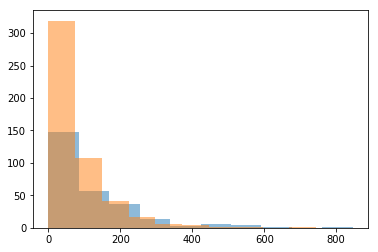

In [0]:
plt.hist(diabetes_yes['insulin'], alpha = .5)
plt.hist(diabetes_no['insulin'], alpha = .5)
plt.show()

It appears from the histograms that this data does not fit a bell curve. 

To confirm, let's also retrieve the  exact measures of skewness and kurtosis. We will do that with `describe()` from [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html).

In [0]:
print(stats.describe(diabetes_yes['insulin']))
print(stats.describe(diabetes_no['insulin']))

DescribeResult(nobs=268, minmax=(0, 846), mean=100.33582089552239, variance=19234.673318799265, skewness=1.8334954476833978, kurtosis=4.257259307676043)
DescribeResult(nobs=500, minmax=(0, 744), mean=68.792, variance=9774.345426853706, skewness=2.4912385539481763, kurtosis=9.35149885142989)


From both the histograms and the statistics, it appears that the samples of this variable are not normally distributed. We will stop our analysis.

We will provide options later in the course for how to proceed with the analysis. For now, let's try another variable: glucose. 

## 2. Do patients with diabetes have higher glucose levels on average than patients without diabetes?

We begin our analysis with the same procedures in checking the sample distributions for normality.

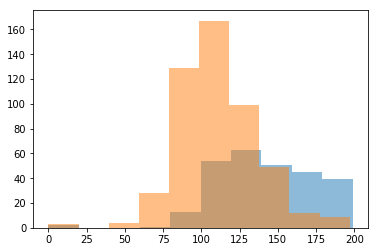

In [0]:
plt.hist(diabetes_yes['glucose'], alpha = .5)
plt.hist(diabetes_no['glucose'], alpha = .5)
plt.show()

These samples look at least *somewhat* more normally distributed than the previous variable.

Plotting the histogram also led us to another benefit: spotting misleading values. The histogram has plotted some values of 0 glucose. This is a small selection of the data, so we are safe simply dropping it and proceeding with the analysis.

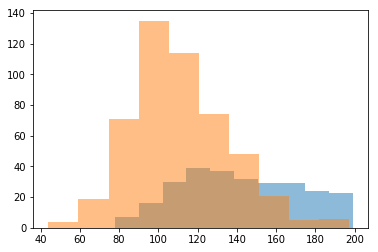

In [0]:
diabetes_yes_filtered_glucose = diabetes_yes[diabetes_yes['glucose']!= 0]
diabetes_no_filtered_glucose = diabetes_no[diabetes_no['glucose']!= 0]

plt.hist(diabetes_yes_filtered_glucose['glucose'], alpha = .5)
plt.hist(diabetes_no_filtered_glucose['glucose'], alpha = .5)
plt.show()

Our histogram looks cleaner now! But the distributions are still questionably normal. Let's get the skewness and kurtosis as well:

In [0]:
print(stats.describe(diabetes_yes_filtered_glucose['glucose']))
print(stats.describe(diabetes_no_filtered_glucose['glucose']))

DescribeResult(nobs=266, minmax=(78, 199), mean=142.31954887218046, variance=876.1125975315648, skewness=0.09012092392161705, kurtosis=-0.9626447554252175)
DescribeResult(nobs=497, minmax=(44, 197), mean=110.64386317907444, variance=613.8950882715649, skewness=0.6529596223112593, kurtosis=0.6434398312102663)


We can live with these results! 

Since the data meets our assumptions, let's proceed this time to the t-test. 

In Python we will use [`ttest_ind()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) from `scipy.stats`.

Our two arguments will be the two arrays representing the glucose levels of patients with and without diabetes.

In [0]:
stats.ttest_ind(diabetes_yes_filtered_glucose['glucose'], diabetes_no_filtered_glucose['glucose'])

Ttest_indResult(statistic=15.700907488875874, pvalue=2.4782891993106313e-48)

We know we can reject the null from either of these results:

1. The test statistic is greater than 1.96.
2. The p-value is less than < .05. 

In fact, the p-value is *way* less than .05. Rather than reporting this tiny-yet-clunky number, it's common to "round up" the reports to a more readable < .01 or even < .001.

Remember, the way to interpret this p-value is like this:

"*There is a .001% chance of observing a difference as large as what is observed even if the two population means are identical (the null hypothesis is true).*"

It is *not*:

"*There is a 99.99% chance that the difference observed reflects a real difference between populations and a .001% chance that the difference is due to chance.*"



Next, let's compute the confidence interval using the formula:

$$(\overline{X}_{1}-\overline{X}_{2}) \pm 1.96 * {\sqrt{\frac{s_{1}^{2}}{n_{1}}+\frac{s_{2}^{2}}{n_{2}}}}$$



Unfortunately, `scipy.stats` does not include the confidence interval for us. However, we can write our own function to compute it:


In [0]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(diabetes_yes_filtered_glucose['glucose'], diabetes_no_filtered_glucose['glucose'])

'The difference in means at the 95% confidence interval (two-tail) is between -35.846783869363435 and -27.504587516848602.'

We can interpret this result as saying that with 95% confidence, patients without diabetes have glucose levels on average between 35.84 and 27.50 mg/dL lower than patients with diabetes.

## Visualizing the difference in means with a pointplot

A pointplot graphs the "point" estimate of a series of numbers along with their respective *error bars* to evalute visually for significant differences in means. 

This can be useful for presenting visual results to a general audience, a topic which we'll return to later in the course.

For this we will use [`pointplot()`](https://seaborn.pydata.org/generated/seaborn.pointplot.html) from `seaborn`. By default, `seaborn` will plot the mean of each datapoint in the array, using the 95% confidence interval as the error bar. Setting `join` to `False` eliminates the connecting line between the two points.

Here we can see visually that the average glucose level is significantly higher for diabetics than non-diabetics.

Note that in cases with a smaller difference in means, it may appear visually that there is no significant difference in means, when there is one statistically. 

That's because in a t-test, we are estimating the confidence interval of the difference in means itself, rather than comparing the confidence inteval of each mean. It's a subtle difference, and one that makes communicating the real-world "effects" of any differences that much harder. The below visual helps explain, but is not entirely accurate of the test. 

[[Text(0, 0, 'diabetes_yes'), Text(0, 0, 'diabetes_no')]]

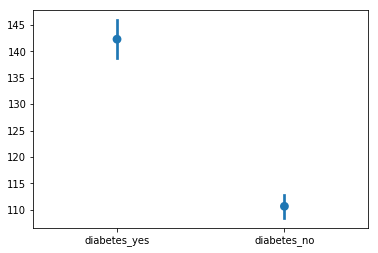

In [0]:
import seaborn as sns

g = sns.pointplot(data=[diabetes_yes_filtered_glucose['glucose'],
                        diabetes_no_filtered_glucose['glucose']], join=False)
                        
g.set(xticklabels = ['diabetes_yes', 'diabetes_no'])